# Fitbit Data Analysis

This Jupyter notebook is designed to process and visualize raw Fitbit data. Fitbit devices are capable of tracking various types of health and activity metrics, which can be valuable for both casual users and researchers.


## Heart Rate Data Processing

### Step 1: Import Libraries

In [1]:
import os
import json
import pandas as pd
import re

### Step 2: Define Function to Load and Summarize JSON Data

In [2]:
def load_and_summarize_json_files(folder_path):
    summary_data = []
    pattern = re.compile(r'heart_rate-(\d{4}-\d{2}-\d{2}).json')
    # count = 0

    for filename in [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]:
        match = pattern.match(filename)
        if match:
            date = match.group(1)
            with open(f'{folder_path}/{filename}', 'r') as file:
                data = json.load(file)
                df = pd.DataFrame(data)
                df[['bpm', 'confidence']] = df['value'].apply(pd.Series)

                # Filter data to include only records with a confidence level of 2 or greater
                filtered_df = df[df['confidence'] >= 2]

                mean_bpm = round(filtered_df['bpm'].mean(), 2)
                max_bpm = round(filtered_df['bpm'].max(), 2)
                min_bpm = round(filtered_df['bpm'].min(), 2)

                summary_data.append({'date': date, 'mean_bpm': mean_bpm, 'max_bpm': max_bpm, 'min_bpm': min_bpm})
                print(date + " appended")
            """             
            count += 1
            if count >= 50:  # Process only the first 50 matching JSON files
                break
            """
    return pd.DataFrame(summary_data)


### Step 3: Read and Summarize Data from the Specific Folder

In [ ]:

folder_path = '.\data\SkyS\Physical Activity'
summary_data = load_and_summarize_json_files(folder_path)

# Convert the "date" column to a datetime object
summary_data['date'] = pd.to_datetime(summary_data['date'])


2015-01-27 appended
2015-01-28 appended
2015-01-29 appended
2015-01-30 appended
2015-01-31 appended
2015-02-01 appended
2015-02-02 appended
2015-02-03 appended
2015-02-04 appended
2015-02-05 appended
2015-02-06 appended
2015-02-07 appended
2015-02-08 appended
2015-02-09 appended
2015-02-10 appended
2015-02-11 appended
2015-02-12 appended
2015-02-13 appended
2015-02-14 appended
2015-02-15 appended
2015-02-16 appended
2015-02-17 appended
2015-02-18 appended
2015-02-19 appended
2015-02-20 appended
2015-02-21 appended
2015-02-22 appended
2015-02-23 appended
2015-02-24 appended
2015-02-25 appended
2015-02-26 appended
2015-02-27 appended
2015-02-28 appended
2015-03-01 appended
2015-03-02 appended
2015-03-03 appended
2015-03-04 appended
2015-03-05 appended
2015-03-06 appended
2015-03-07 appended
2015-03-08 appended
2015-03-09 appended
2015-03-10 appended
2015-03-11 appended
2015-03-12 appended
2015-03-13 appended
2015-03-14 appended
2015-03-15 appended
2015-03-16 appended
2015-03-17 appended


2022-05-09 appended
2022-05-10 appended
2022-05-11 appended
2022-05-12 appended
2022-05-13 appended
2022-05-14 appended
2022-05-15 appended
2022-05-16 appended
2022-05-17 appended
2022-05-18 appended
2022-05-19 appended
2022-05-20 appended
2022-05-21 appended
2022-05-22 appended
2022-05-23 appended
2022-05-24 appended
2022-05-25 appended
2022-05-26 appended
2022-05-27 appended
2022-05-28 appended
2022-05-29 appended
2022-05-30 appended
2022-05-31 appended
2022-06-01 appended
2022-06-02 appended
2022-06-03 appended
2022-06-04 appended
2022-06-05 appended
2022-06-06 appended
2022-06-07 appended
2022-06-08 appended
2022-06-09 appended
2022-06-10 appended
2022-06-11 appended
2022-06-12 appended
2022-06-13 appended
2022-06-14 appended
2022-06-15 appended
2022-06-16 appended
2022-06-17 appended
2022-06-18 appended
2022-06-19 appended
2022-06-20 appended
2022-06-21 appended
2022-06-22 appended
2022-06-23 appended
2022-06-24 appended
2022-06-25 appended
2022-06-26 appended
2022-06-27 appended


### Step 4: Export to CSV

In [55]:
output_csv_path = './output/heart_rate_processed.csv'
summary_data.to_csv(output_csv_path, index=False)
print(f"Summary data saved to {output_csv_path}")


Summary data saved to ./output/heart_rate_processed.csv


### Step 5: Visualizations

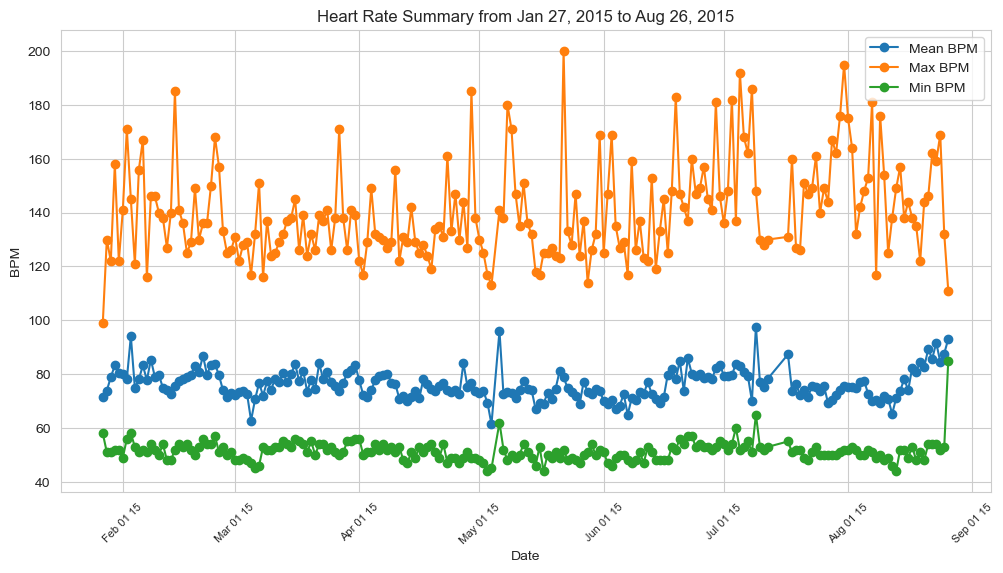

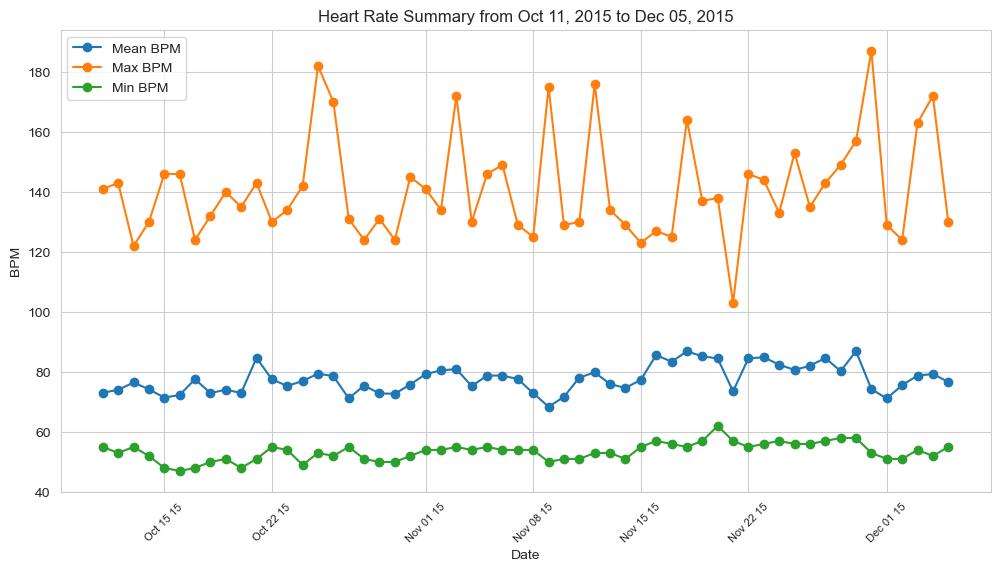

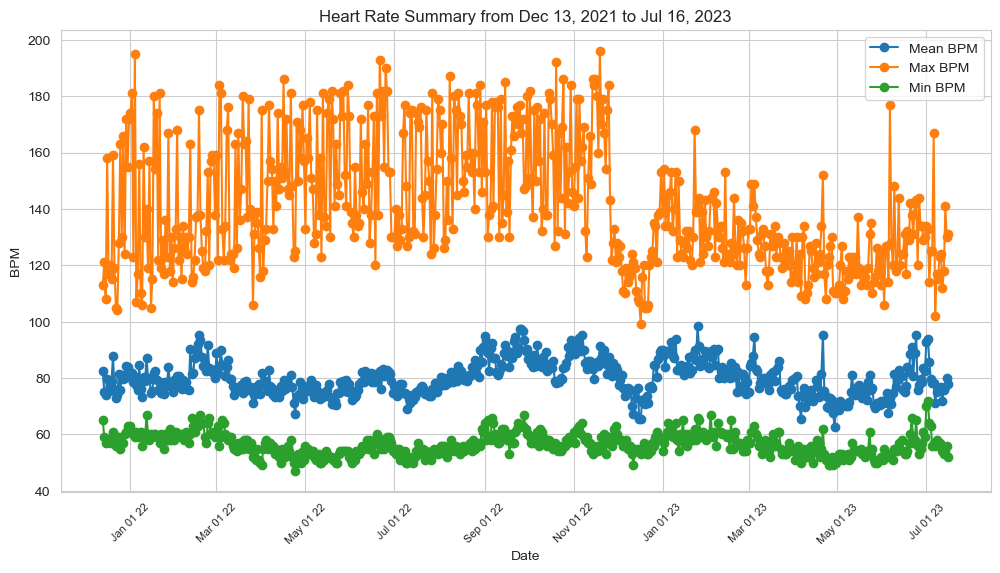

In [65]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Find the indices where there is a gap of more than 5 days
gaps = summary_data['date'].diff() > pd.Timedelta(days=5)
break_points = gaps[gaps].index.tolist()

# Add the start and end indices of the DataFrame
break_points = [0] + break_points + [len(summary_data)]


# Plot each contiguous segment in a separate graph
for i in range(len(break_points) - 1):
    segment = summary_data.iloc[break_points[i]:break_points[i + 1]]
    
    # Get the beginning and ending date for the segment
    start_date = segment['date'].iloc[0].strftime('%b %d, %Y')
    end_date = segment['date'].iloc[-1].strftime('%b %d, %Y')
    
    plt.figure(figsize=(12, 6))
    plt.plot(segment['date'], segment['mean_bpm'], label='Mean BPM', marker='o')
    plt.plot(segment['date'], segment['max_bpm'], label='Max BPM', marker='o')
    plt.plot(segment['date'], segment['min_bpm'], label='Min BPM', marker='o')
    plt.xlabel('Date')
    plt.ylabel('BPM')
    
    # Set the title to include the beginning and ending date for the segment
    plt.title(f'Heart Rate Summary from {start_date} to {end_date}')
    
    plt.legend()

    # Set the x-axis date format to be more concise
    date_format = mdates.DateFormatter('%b %d %y')  # Example: 'Jan 01 15'
    plt.gca().xaxis.set_major_formatter(date_format)

    # Rotate the date labels for better visibility
    plt.xticks(rotation=45, fontsize=8)  # Set small font size

    plt.show()


#### Plot Max BPM Distribution

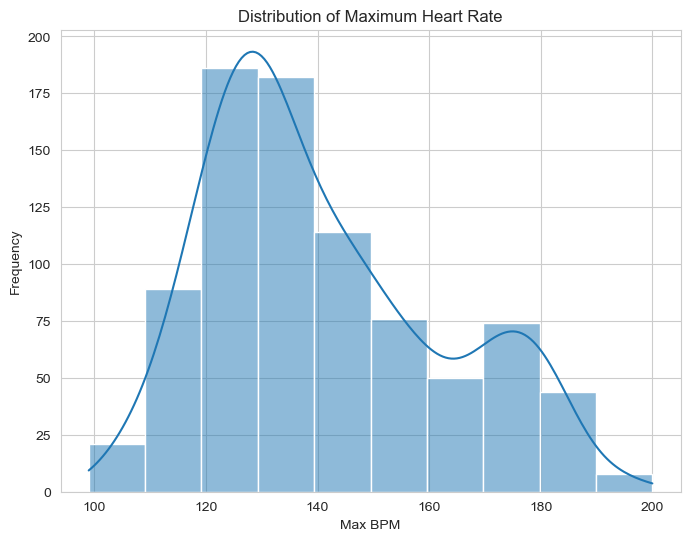

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(summary_data['max_bpm'], bins=10, kde=True)
plt.xlabel('Max BPM')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate')
plt.show()

#### Plot Min BPM Distribution

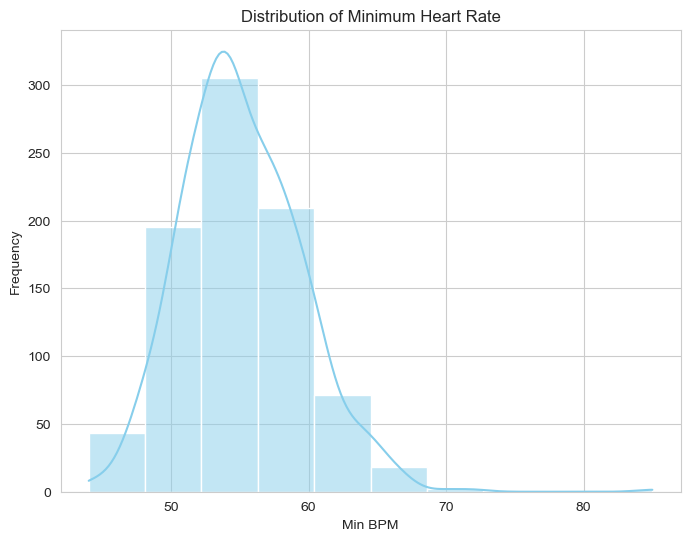

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(summary_data['min_bpm'], bins=10, kde=True, color='skyblue')
plt.xlabel('Min BPM')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Heart Rate')
plt.show()